In [38]:
import pandas as pd
import folium

# Carica il file CSV contenente latitudine, longitudine e valore medio
df = pd.read_csv('DatiPulitiPM10.csv')  # Sostituisci 'DatiPulitiPM10.csv' con il nome del tuo file CSV

# Aggrega i dati per Comune e Provincia, prendendo il valore massimo per ogni gruppo
# Assicurati di mantenere le colonne 'latitudine' e 'longitudine'
df_max = df.groupby(['Comune', 'Provincia'], as_index=False).agg({
    'Valore medio annuo': 'max',
    'latitudine': 'first',
    'longitudine': 'first'
})

# Crea una mappa centrata su una posizione iniziale (ad esempio, il centro geografico del tuo dataset)
mappa = folium.Map(location=[df_max['latitudine'].mean(), df_max['longitudine'].mean()], zoom_start=12)

# Aggiungi cerchi per ogni riga del CSV con colore condizionale e popup
for index, row in df_max.iterrows():
    # Determina il colore del cerchio in base al valore della colonna 'Valore medio annuo'
    if row['Valore medio annuo'] < 20:
        colore = 'green'
    elif 20 <= row['Valore medio annuo'] <= 50:
        colore = 'yellow'
    else:
        colore = 'pink'
    
    # Crea il popup con le informazioni dal CSV
    popup_info = f"Comune: {row['Comune']}<br>Provincia: {row['Provincia']}<br>Valore Medio: {row['Valore medio annuo']}"

    # Aggiungi il cerchio alla mappa con il colore e il popup
    folium.Circle(
        location=[row['latitudine'], row['longitudine']],  # Posizione del cerchio
        radius=100,  # Raggio del cerchio in metri
        color=colore,  # Colore del bordo
        fill=True,  # Riempie il cerchio
        fill_color=colore,  # Colore di riempimento
        fill_opacity=0.4,  # Opacità del riempimento
        popup=popup_info  # Popup con le informazioni
    ).add_to(mappa)

# Salva la mappa come file HTML
html_file = 'mappa_con_popupPM10.html'
mappa.save(html_file)

# Stampa un messaggio di successo
print("Mappa generata e salvata come 'mappa_con_popupPM10.html'")


Mappa generata e salvata come 'mappa_con_popupPM10.html'


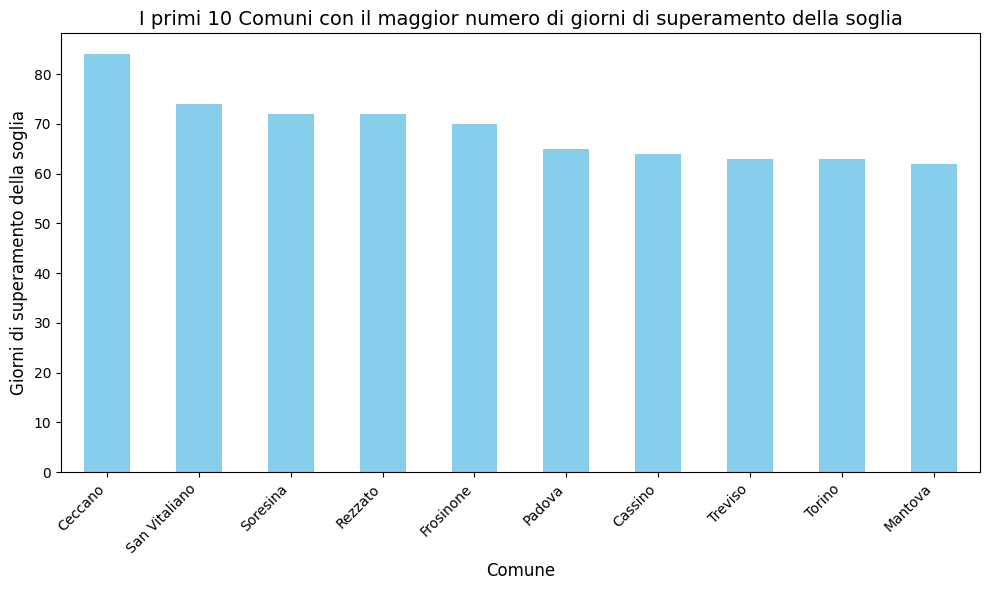

In [14]:
import matplotlib.pyplot as plt

# Carica il file CSV contenente i dati
df = pd.read_csv('DatiPulitiPM10.csv')  # Sostituisci con il nome del tuo file CSV

# Raggruppa per Comune e prendi il valore massimo dei giorni di superamento della soglia
comuni_superamento = df.groupby('Comune')['Giorni superamento soglia'].max()

# Ordina i Comuni per numero di giorni di superamento della soglia in ordine decrescente
comuni_superamento = comuni_superamento.sort_values(ascending=False)

# Seleziona i primi 10 Comuni con il maggiore numero di giorni di superamento della soglia
top_10_comuni = comuni_superamento.head(10)


# Crea il grafico a barre
plt.figure(figsize=(10, 6))
top_10_comuni.plot(kind='bar', color='skyblue')

# Aggiungi titolo e etichette agli assi
plt.title('I primi 10 Comuni con il maggior numero di giorni di superamento della soglia', fontsize=14)
plt.xlabel('Comune', fontsize=12)
plt.ylabel('Giorni di superamento della soglia', fontsize=12)

# Ruota le etichette dell'asse x per una migliore leggibilità
plt.xticks(rotation=45, ha='right')
# Mostra il grafico
plt.tight_layout()
plt.show()


C:\Users\Siam1838\AppData\Local\Temp\ipykernel_10188\3132578792.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  legend_labels = [f'{categories[i]}: {category_counts[i]} Comuni ({category_percentages[i]:.1f}%)' for i in range(len(categories))]


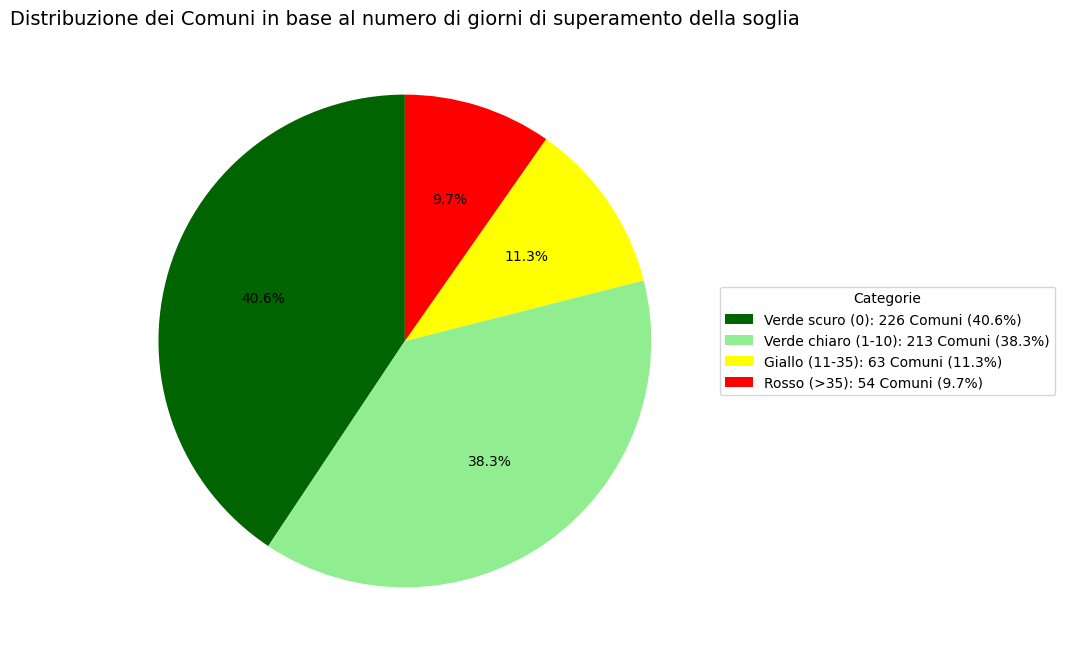

In [30]:



# Carica i dati dal file CSV
df = pd.read_csv('DatiPulitiPM10.csv')

# Assumiamo che la colonna 'Giorni superamento soglia' contenga il numero di giorni di superamento per ogni Comune
comuni_superamento = df['Giorni superamento soglia']

# Definiamo le categorie in base ai giorni di superamento della soglia
categories = ['Verde scuro (0)', 'Verde chiaro (1-10)', 'Giallo (11-35)', 'Rosso (>35)']

# Creiamo una colonna 'Categoria' nel DataFrame in base ai giorni di superamento
df['Categoria'] = pd.cut(comuni_superamento, bins=[-1, 0, 10, 35, float('inf')], labels=categories)

# Calcoliamo il numero di Comuni per ciascuna categoria
category_counts = df['Categoria'].value_counts()

# Calcoliamo la percentuale di Comuni per ciascuna categoria
total_comuni = len(df)
category_percentages = (category_counts / total_comuni) * 100

# Crea il grafico a torta
fig, ax = plt.subplots(figsize=(8, 8))

# Imposta i colori per ciascuna categoria
colors = ['darkgreen', 'lightgreen', 'yellow', 'red']

# Crea la torta (senza etichette)
wedges, texts, autotexts = ax.pie(category_counts, labels=None, colors=colors, autopct='%1.1f%%', startangle=90)

# Aggiungi il titolo
plt.title("Distribuzione dei Comuni in base al numero di giorni di superamento della soglia", fontsize=14)

# Crea la legenda
# Associa i colori con le categorie e i dati
legend_labels = [f'{categories[i]}: {category_counts[i]} Comuni ({category_percentages[i]:.1f}%)' for i in range(len(categories))]

# Aggiungi la legenda fuori dal grafico
ax.legend(wedges, legend_labels, title="Categorie", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Mostra il grafico
plt.show()


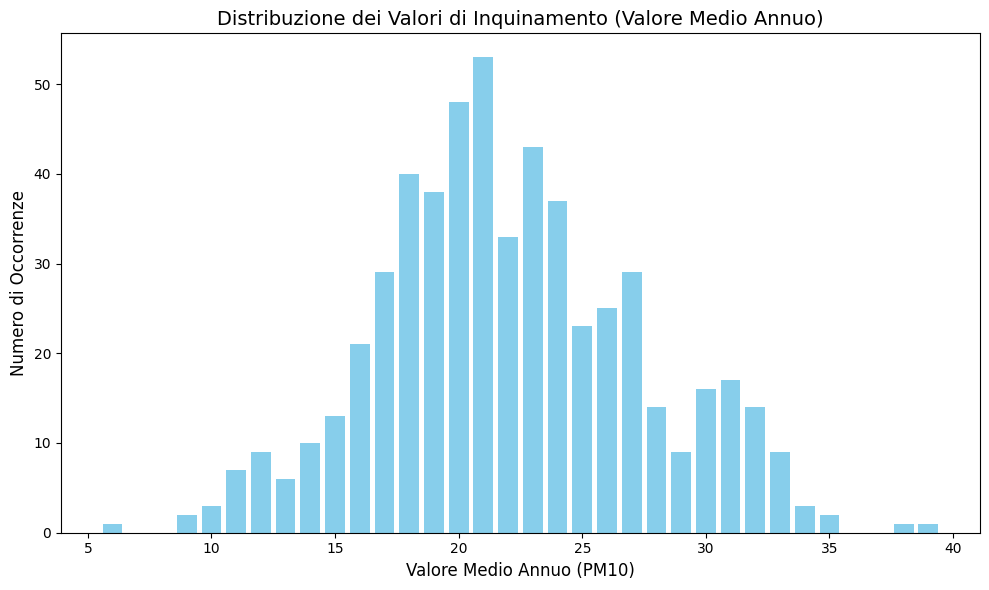

In [39]:
# Carica i dati dal file CSV
df = pd.read_csv('DatiPulitiPM10.csv')

# Conteggia il numero di volte che ogni valore di 'Valore medio annuo' appare nel dataset
valore_counts = df['Valore medio annuo'].value_counts().sort_index()

# Crea un grafico a barre (istogramma)
plt.figure(figsize=(10,6))
plt.bar(valore_counts.index, valore_counts.values, color='skyblue')

# Aggiungi titolo e etichette agli assi
plt.title("Distribuzione dei Valori di Inquinamento (Valore Medio Annuo)", fontsize=14)
plt.xlabel("Valore Medio Annuo (PM10)", fontsize=12)
plt.ylabel("Numero di Occorrenze", fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()